# Sentence Segmentation

In [1]:
import glob
from bs4 import BeautifulSoup as bs

import nltk
from nltk import word_tokenize
from nltk.tokenize.punkt import PunktSentenceTokenizer

import matplotlib.pyplot as plt
import seaborn as sb

import pandas as pd

sentence_tokenizer = PunktSentenceTokenizer()
def tokenize_word(s):
    return [word for word in word_tokenize(s) if any(char.isalpha() or char.isdigit() for char in word)]

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zytan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Extract Text

In [2]:
chemistry_texts = dict()

def remove(text, tag):
    front = "<" + tag + ">"
    end = "</" + tag + ">"
    return text.replace(front, "").replace(end, "")    

# Read the XML file
for filename in glob.glob('Dataset/chemistry/*.xml'):
    all_paragraphs = list()
    with open(filename, "r") as f:
        # Read each line in the file, readlines() returns a list of lines
        content = f.read()
        content = remove(content, "sup")
        content = remove(content, "sub")
        content = remove(content, "italic")
        content = remove(content, "bold")
        soup = bs(content, 'html.parser')
        for p in soup.find_all('p'):
            paragraph = p.get_text(' ').replace('\u2009', ' ')
            all_paragraphs.append(paragraph)
    chemistry_texts[filename] = "\n".join(all_paragraphs)

In [3]:
legal_texts = dict()

# Read the XML files
for filename in glob.glob('Dataset/legal/*.xml'):
    with open(filename, 'r') as f:
        content = f.read()
        soup = bs(content, 'html.parser')
        legal_texts[filename] = soup.get_text()

In [4]:
with open('Dataset/sports.txt', 'r', encoding='utf-8') as f:
    sports_texts = f.read()

## Segmentation

In [5]:
chemistry_tokens = list()
for k, v in chemistry_texts.items():
    chemistry_tokens += sentence_tokenizer.tokenize(v)

In [6]:
legal_tokens = list()
for k, v in legal_texts.items():
    legal_tokens += sentence_tokenizer.tokenize(v)

In [7]:
sports_tokens = sentence_tokenizer.tokenize(sports_texts)

## Length Distribution

In [8]:
chemistry_length = pd.Series(map(len, map(tokenize_word, chemistry_tokens)))
legal_length = pd.Series(map(len, map(tokenize_word, legal_tokens)))
sports_length = pd.Series(map(len, map(tokenize_word, sports_tokens)))

all_lengths = pd.concat(
    [
        chemistry_length.value_counts(normalize=True),
        legal_length.value_counts(normalize=True),
        sports_length.value_counts(normalize=True)
    ], 
    axis=1
).fillna(0)
all_lengths.columns = ['chemistry', 'legal', 'sports']

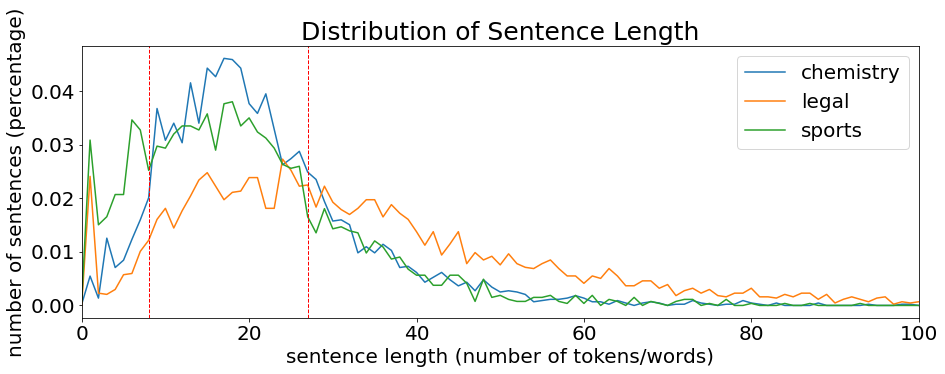

In [9]:
f, ax = plt.subplots(1, 1, figsize=(15, 5))
all_lengths.plot(ax=ax)
ax.set_xlabel('sentence length (number of tokens/words)', fontsize=20)
ax.set_ylabel('number of sentences (percentage)', fontsize=20)
ax.set_title('Distribution of Sentence Length', fontsize=25)
ax.set_xlim((0, 100))
ax.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.axvline(x=8, linestyle='--', linewidth=1.0, color='r')
ax.axvline(x=27, linestyle='--', linewidth=1.0, color='r')
plt.show()

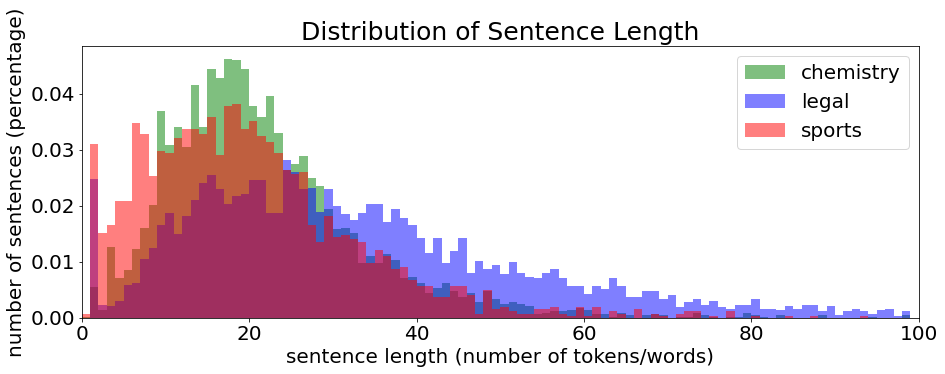

In [10]:
# Normalize
kwargs = dict(alpha=0.5, bins=range(0, 100), density=True, stacked=True)

# Plot
f, ax = plt.subplots(1, 1, figsize=(15, 5))
plt.hist(chemistry_length, **kwargs, color='g', label='chemistry')
plt.hist(legal_length, **kwargs, color='b', label='legal')
plt.hist(sports_length, **kwargs, color='r', label='sports')
ax.set_xlabel('sentence length (number of tokens/words)', fontsize=20)
ax.set_ylabel('number of sentences (percentage)', fontsize=20)
ax.set_title('Distribution of Sentence Length', fontsize=25)
plt.rcParams.update({'legend.fontsize': 20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(0, 100)
plt.legend();